# Project data exploration - looking at relplot and scatter
Using a dataset that your group is consider using for the term project, let's do some data exploring of the different features in your dataset and their relationships

Group name: Snowy Plovers
Created by Sherine Aldrin (017197492), Zara Rahim (017151069), Bhavya Vatsavayi   
Last updated: 9/23/25  
Briefly describe your dataset:

Our dataset is about monitoring Snowy Plovers at the Point Reyes National Seashore. We merged two datatsets -- one about the observation of nearby predators and one about observations of any Snowy Plovers. For example, the observations include their behavior, notes of physical characteristics, and location.

Import your data. If you want to mount your Google drive you can use `from google.colab import drive` and `drive.mount('/content/drive')`

### Q1: Show the number of missing data in each column of the dataframe

In [2]:
# Your code here . . .
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

dfObservation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/SFAN_SNPL_Observations.csv')
dfPredator = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/SFAN_SNPL_Predators.csv')

#show missing data
dfObservation.isna().sum()

dfPredator.isna().sum()

Mounted at /content/drive


,0
ID,0
Predator_Data_ID,0
Event_ID,0
Type,0
Basis_Of_Record,0
Unit_Code,0
Location_ID,0
Loc_Code,0
Loc_Name,0
Start_Year,0


### Q2: Show the data type for each column of the dataframe

In [3]:
# Your code here . . .
merged_df = pd.merge(dfObservation, dfPredator, on='ID')
#print(merged_df)

print(merged_df.dtypes)
#print(dfPredator.dtypes)

ID                       int64
SNPL_Data_ID            object
Event_ID_x              object
Type_x                  object
Basis_Of_Record_x       object
                        ...   
Decimal_Longitude_y    float64
Decimal_Latitude_y     float64
Coord_System_y          object
Datum_y                 object
PredatorNotes           object
Length: 69, dtype: object


### Q3: Create a pair plot to show pairwise relationship in this dataset.
Draw the pairwise polynomial regression lines in a different color than the data points. Use a light color for the data points to deemphasizing the points to make the regression line stand out. Include a meaningful title to the plot.

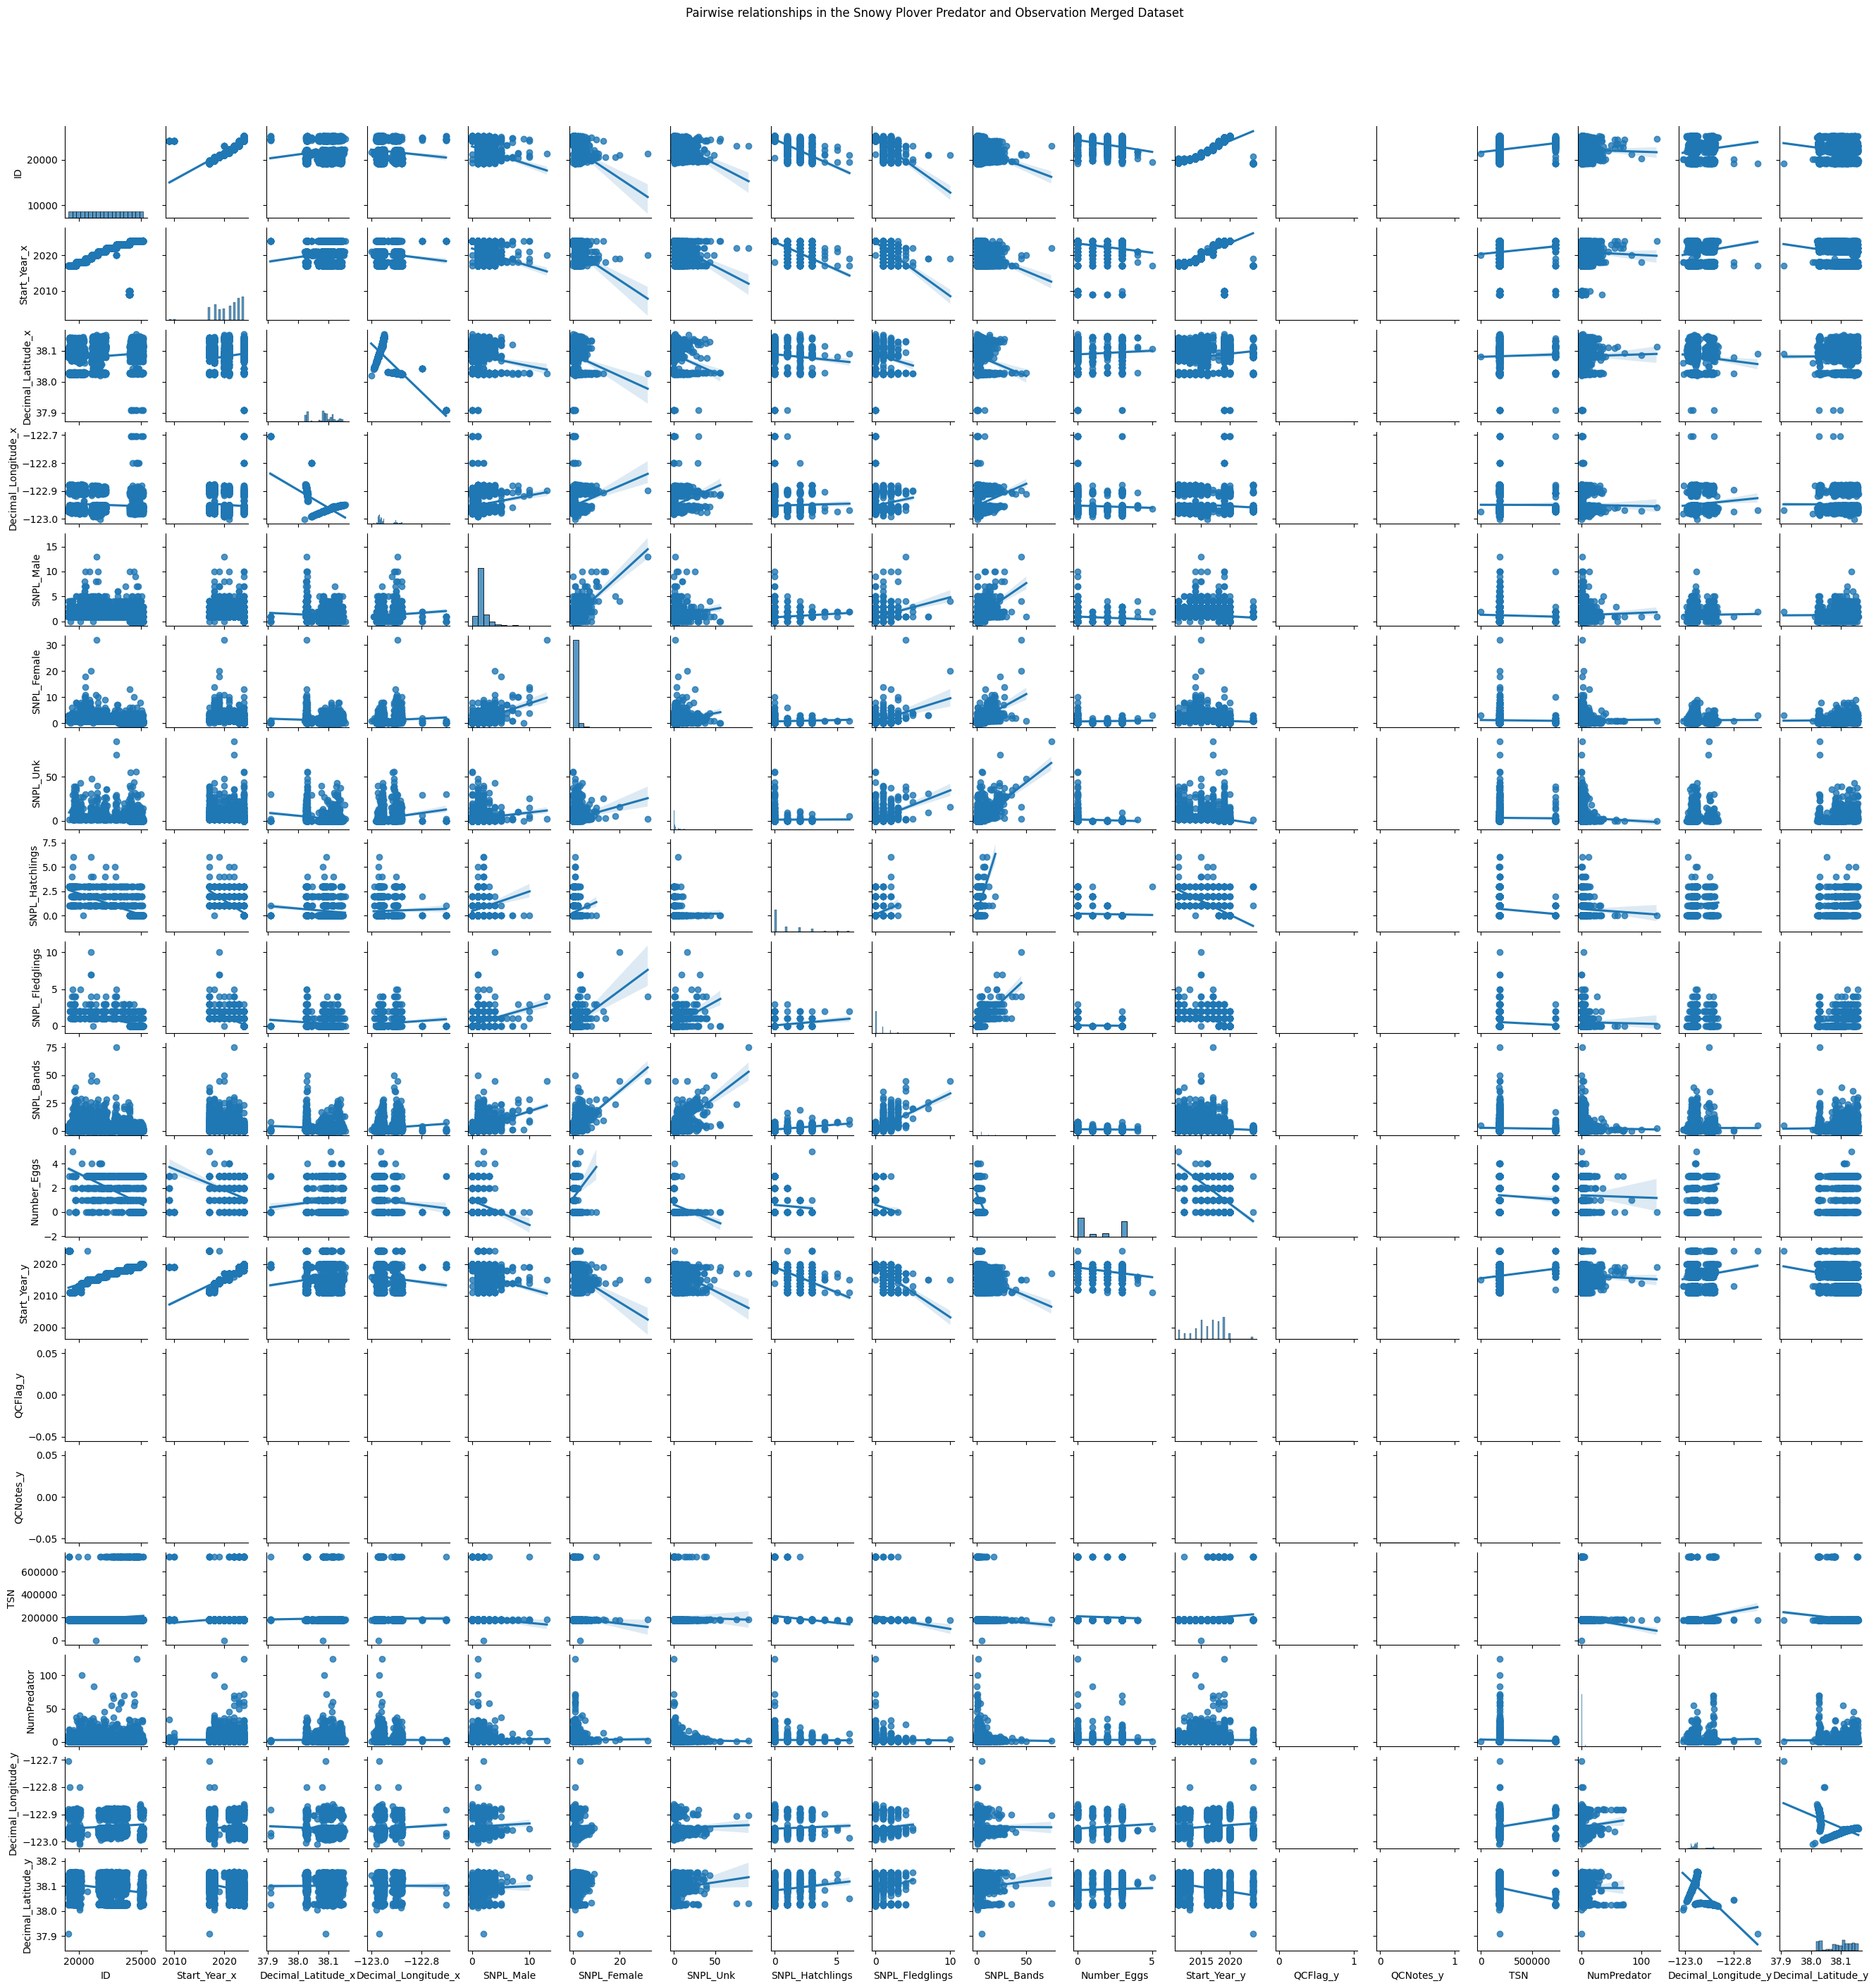

In [4]:
# Your code here . . .
g=sns.pairplot(
    data=merged_df,
    height=1.5,
    kind = "reg",
);
g.fig.suptitle(
    "Pairwise relationships in the Snowy Plover Predator and Observation Merged Dataset", y=1.05
);

### Q4: Plot a regression line and confidence interval
Select two of the features from your dataset and create a lmplot that shows the linear regression between them. Filter your data as you see fit. Include a meaningful title for the plot.

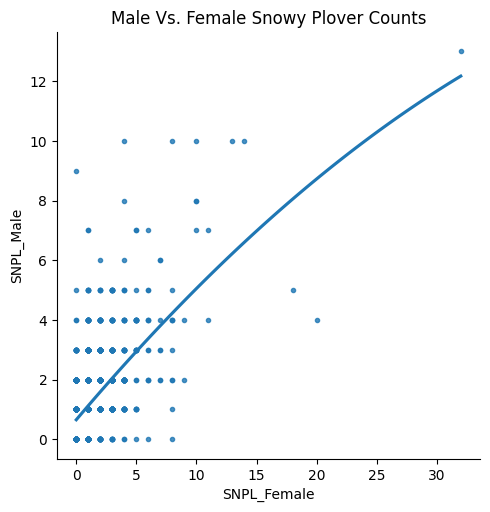

In [5]:
# Your code here . . .
sns.lmplot(
     data=merged_df,
     x="SNPL_Female",
     y="SNPL_Male",
     ci=None,
     order=2,
     markers='.'#,
     #scatter_kws={'s':2}
)
plt.title(
"Male Vs. Female Snowy Plover Counts"
);

### Q5. Create a relplot that shows multiple features in a single plot.
Select two features from your dataset and plot a scatter plot. Select two additional features you want to highlight in your data points using `hue` and `size`. Include a meaningful title to the plot.

visualizing how predator types vary over time (Start_Year_x) and what actions they took (PredatorAction), with the number of predators highlighted by point size.

<Axes: xlabel='Start_Year_x', ylabel='PredatorType'>

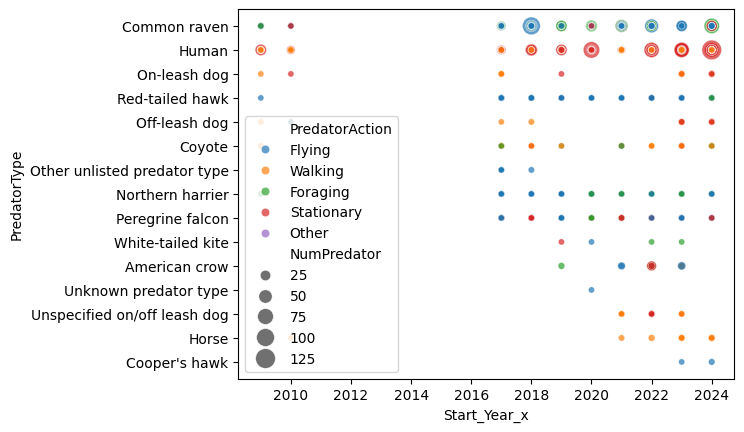

In [6]:
# Your code here . . .
sns.scatterplot(
    data=merged_df,
    x="Start_Year_x",
    y="PredatorType",
    size="NumPredator",
    hue="PredatorAction",
    alpha=0.7,
    sizes=(20, 200)
)

### Q6: Create a plot with small multiples plots
Select two features from your dataset and show the relationship between the features with an additional feature as the single category. Organize the multiple plots to have 3 plots per row. Set the `height` of the plot to 5 and the size the of data point to 20. Include a meaningful title in the plot.

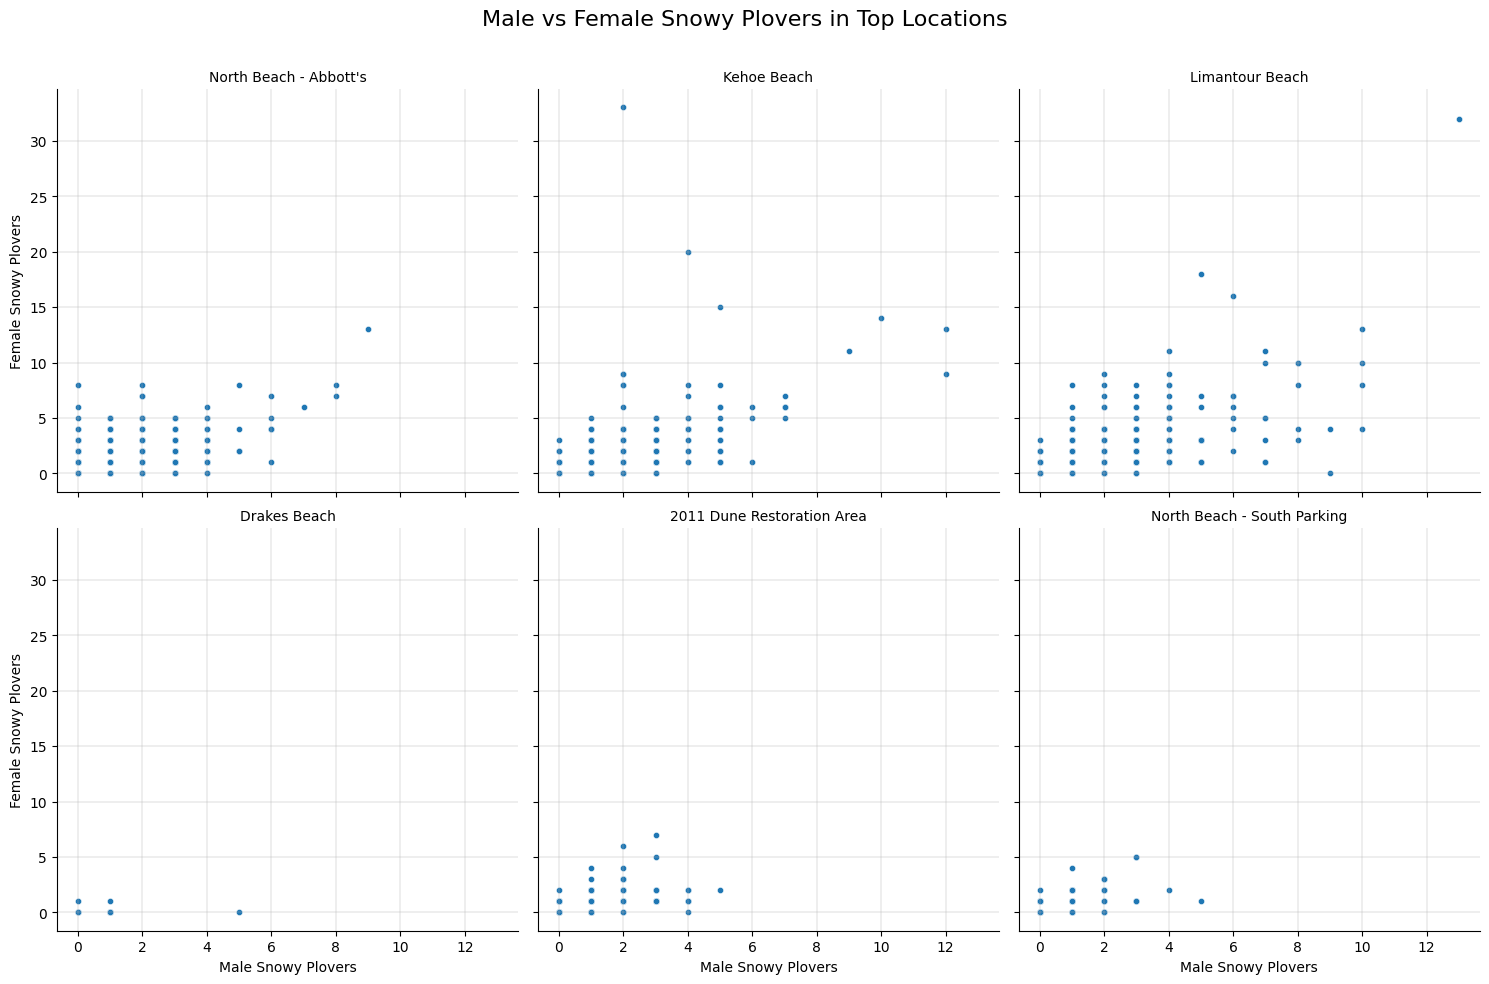

In [7]:
x_feature = "SNPL_Male"
y_feature = "SNPL_Female"
category  = "Loc_Name"

plot_df = dfObservation[[x_feature, y_feature, category]].dropna()

top_locs = plot_df[category].value_counts().head(6).index
plot_df = plot_df[plot_df[category].isin(top_locs)]


g = sns.FacetGrid(plot_df, col=category, col_wrap=3, height=5, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x=x_feature, y=y_feature, s=20)

g.set_axis_labels("Male Snowy Plovers", "Female Snowy Plovers")
g.set_titles("{col_name}")
for ax in g.axes.flatten():
    ax.grid(True, linewidth=0.3)

plt.subplots_adjust(top=0.90)
g.fig.suptitle("Male vs Female Snowy Plovers in Top Locations", fontsize=16)
plt.show()

In [8]:
merged_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/SNPL_merged_dataset.csv', index=False)